In [1]:
from __future__ import print_function, division

In [2]:
# This changes the current directory to the base saga directory - make sure to run this first!
# This is necessary to be able to import the py files and use the right directories,
# while keeping all the notebooks in their own directory.
import os
import sys
from time import time

if 'saga_base_dir' not in locals():
    saga_base_dir = os.path.abspath('..')
if saga_base_dir not in sys.path:
    os.chdir(saga_base_dir)

In [3]:
import targeting
import casjobs

import numpy as np

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy.io import fits

from astropy.utils.console import ProgressBar
from astropy.utils import data

In [4]:
%matplotlib inline
from matplotlib import style, pyplot as plt

plt.style.use('seaborn-deep')
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['figure.figsize'] = (14, 8)

In [5]:
from IPython import display

In [6]:
# from the DECALS low-SB_brick selection and data download notebook
bricknames = ['1181m012', '2208m005']

# Load the catalogs 

In [7]:
catalog_fns = ['decals_dr3/catalogs/tractor-{}.fits'.format(bnm) for bnm in bricknames]
decals_catalogs = [Table.read(fn) for fn in catalog_fns]
decals_catalogs[0]

brickid,brickname,objid,brick_primary,blob,ninblob,tycho2inblob,type,ra,ra_ivar,dec,dec_ivar,bx,by,bx0,by0,left_blob,out_of_bounds,dchisq [5],ebv,cpu_source,cpu_blob,blob_width,blob_height,blob_npix,blob_nimages,blob_totalpix,decam_flux [6],decam_flux_ivar [6],"decam_apflux [6,8]","decam_apflux_resid [6,8]","decam_apflux_ivar [6,8]",decam_mw_transmission [6],decam_nobs [6],decam_rchi2 [6],decam_fracflux [6],decam_fracmasked [6],decam_fracin [6],decam_anymask [6],decam_allmask [6],decam_psfsize [6],wise_flux [4],wise_flux_ivar [4],wise_mw_transmission [4],wise_nobs [4],wise_fracflux [4],wise_rchi2 [4],"wise_lc_flux [2,5]","wise_lc_flux_ivar [2,5]","wise_lc_nobs [2,5]","wise_lc_fracflux [2,5]","wise_lc_rchi2 [2,5]","wise_lc_mjd [2,5]",fracDev,fracDev_ivar,shapeExp_r,shapeExp_r_ivar,shapeExp_e1,shapeExp_e1_ivar,shapeExp_e2,shapeExp_e2_ivar,shapeDev_r,shapeDev_r_ivar,shapeDev_e1,shapeDev_e1_ivar,shapeDev_e2,shapeDev_e2_ivar,decam_depth [6],decam_galdepth [6]
,,,,,,,,deg,1/deg^2,deg,1/deg^2,,,,,,,,mag,,,,,,,,nanomaggy,1/nanomaggy^2,nanomaggy,nanomaggy,1/nanomaggy^2,,,,,,,,,,nanomaggy,1/nanomaggy^2,,,,,nanomaggy,1/nanomaggy^2,,,,,,,arcsec,1/arcsec^2,,,,,arcsec,1/arcsec^2,,,,,1/nanomaggy^2,1/nanomaggy^2
int32,str8,int32,bool,int32,int16,bool,str4,float64,float32,float64,float32,float32,float32,float32,float32,bool,bool,float32,float32,float32,float32,int16,int16,int32,int16,int32,float32,float32,float32,float32,float32,float32,uint8,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
323640,1181m012,0,False,0,6,False,PSF,118.252594487,2.48411e+15,-1.37830825142,2.9577e+15,46.7933,36.436,46.0,36.0,False,False,6.35332e+07 .. 6.35482e+07,0.0406656,22.65,130.26,83,90,5116,38,171961,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.861026 .. 0.960932,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,320.46 .. 31.0905,1.07987 .. 2.04253e-05,0.993132 .. 0.999659,41 .. 12,0.0223309 .. 9.62853,27.0945 .. 0.0823431,331.142 .. 0.0,0.414911 .. 0.0,16 .. 0,0.0233279 .. 0.0,17.787 .. 0.0,55303.8 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0
323640,1181m012,1,False,0,6,False,PSF,118.25248065,8.3185e+13,-1.3797732897,8.71538e+13,48.358,16.3056,49.0,16.0,False,False,2.1115e+06 .. 2.11352e+06,0.0405094,21.4,130.26,83,90,5116,38,171961,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.861521 .. 0.961079,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,21.4567 .. 597.496,1.10308 .. 1.95185e-05,0.993158 .. 0.999661,41 .. 12,5.05534 .. 1.02405,4.64669 .. 0.0802848,25.9851 .. 0.0,0.406838 .. 0.0,16 .. 0,4.15867 .. 0.0,6.55349 .. 0.0,55303.8 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0
323640,1181m012,2,False,0,6,False,COMP,118.253975867,1.87005e+11,-1.38001019888,1.24083e+11,27.819,13.0492,29.0,13.0,False,False,9281.39 .. 12596.4,0.0405217,49.17,130.26,83,90,5116,38,171961,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.861482 .. 0.961068,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,-4.0062 .. -628.627,0.14315 .. 3.94969e-06,0.993156 .. 0.99966,41 .. 12,48.7014 .. 1.72035,2.17504 .. 0.0467402,-29.0428 .. 0.0,0.0545248 .. 0.0,16 .. 0,7.07213 .. 0.0,2.16092 .. 0.0,55303.8 .. 0.0,0.753709,134198.0,1.06713,2907.79,0.456989,2088.82,0.522141,1884.8,57.5912,600609.0,-0.851406,586060.0,-0.438843,588830.0,0.0 .. 0.0,0.0 .. 0.0
323640,1181m012,3,False,0,6,False,PSF,118.250163122,4.09477e+10,-1.38054929014,4.2057e+10,80.1934,5.64461,80.0,7.0,False,False,1272.49 .. 0.0,0.0403772,13.02,130.26,83,90,5116,38,171961,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.86194 .. 0.961204,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,-2.70414 

In [8]:
sdss_fns = ['decals_dr3/catalogs/sdss_comparison_{}.csv'.format(bnm) for bnm in bricknames]
sdss_catalogs = [Table.read(fn) for fn in sdss_fns]
sdss_catalogs[0]

OBJID,RA,DEC,PHOTPTYPE,PHOT_SG,FLAGS,SATURATED,BAD_COUNTS_ERROR,BINNED1,u,g,r,i,z,u_err,g_err,r_err,i_err,z_err,MODELMAGERR_U,MODELMAGERR_G,MODELMAGERR_R,MODELMAGERR_I,MODELMAGERR_Z,EXTINCTION_U,EXTINCTION_G,EXTINCTION_R,EXTINCTION_I,EXTINCTION_Z,DERED_U,DERED_G,DERED_R,DERED_I,DERED_Z,PETRORAD_U,PETRORAD_G,PETRORAD_R,PETRORAD_I,PETRORAD_Z,PETRORADERR_U,PETRORADERR_G,PETRORADERR_R,PETRORADERR_I,PETRORADERR_Z,DEVRAD_U,DEVRADERR_U,DEVRAD_G,DEVRADERR_G,DEVRAD_R,DEVRADERR_R,DEVRAD_I,DEVRADERR_I,DEVRAD_Z,DEVRADERR_Z,DEVAB_U,DEVAB_G,DEVAB_R,DEVAB_I,DEVAB_Z,CMODELMAG_U,CMODELMAGERR_U,CMODELMAG_G,CMODELMAGERR_G,CMODELMAG_R,CMODELMAGERR_R,CMODELMAG_I,CMODELMAGERR_I,CMODELMAG_Z,CMODELMAGERR_Z,PSFMAG_U,PSFMAGERR_U,PSFMAG_G,PSFMAGERR_G,PSFMAG_R,PSFMAGERR_R,PSFMAG_I,PSFMAGERR_I,PSFMAG_Z,PSFMAGERR_Z,FIBERMAG_U,FIBERMAGERR_U,FIBERMAG_G,FIBERMAGERR_G,FIBERMAG_R,FIBERMAGERR_R,FIBERMAG_I,FIBERMAGERR_I,FIBERMAG_Z,FIBERMAGERR_Z,FRACDEV_U,FRACDEV_G,FRACDEV_R,FRACDEV_I,FRACDEV_Z,Q_U,U_U,Q_G,U_G,Q_R,U_R,Q_I,U_I,Q_Z,U_Z,EXPAB_U,EXPRAD_U,EXPPHI_U,EXPAB_G,EXPRAD_G,EXPPHI_G,EXPAB_R,EXPRAD_R,EXPPHI_R,EXPAB_I,EXPRAD_I,EXPPHI_I,EXPAB_Z,EXPRAD_Z,EXPPHI_Z,FIBER2MAG_R,FIBER2MAGERR_R,EXPMAG_R,EXPMAGERR_R,PETROR50_R,PETROR90_R,PETROMAG_R,SB_EXP_R,SB_PETRO_R,J,JERR,H,HERR,K,KERR,SPEC_Z,SPEC_Z_ERR,SPEC_Z_WARN,PHOTOZ,PHOTOZ_ERR
int64,float64,float64,int64,str6,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64
1237654897369154977,118.247078281,-1.22702362619,3,GALAXY,68987912960,0,0,268435456,25.86295,22.23933,21.72915,21.62504,21.40479,0.8041412,0.1315473,0.1339975,0.1655383,0.5272087,0.8041412,0.1315473,0.1339975,0.1655383,0.5272087,0.2340218,0.1823482,0.1261476,0.09374122,0.06972624,25.62893,22.05698,21.603,21.5313,21.33507,2.969511,1.896771,2.97004,2.970034,2.560491,-1000.0,0.3749135,-1000.0,-1000.0,2.491575,0.003932867,26.23261,0.6793264,0.8973287,0.493544,0.5927007,0.2359818,1.81346,3.928376,13.44596,0.05211781,0.05,0.3849464,0.07416825,0.05,25.73388,0.8993316,22.19782,0.1576473,21.72915,0.1716961,21.83791,0.1538367,20.41482,0.542708,25.55567,0.7969484,22.5174,0.1297671,22.03825,0.1315599,21.84756,0.1487907,21.62201,0.4641873,24.88329,1.144063,22.74823,0.1806333,22.24165,0.1956361,22.24167,0.2660455,21.77338,0.6455019,0.0,1.0,1.0,0.0,0.9262917,0.00845019,0.2786115,-0.01069896,-0.02973697,0.02208714,-0.09000418,-1.787702,-1.615481,-0.4848515,0.4824912,0.1044768,0.007456085,108.8591,0.2715158,0.7770585,155.8067,0.3761893,0.4889817,174.5654,0.06891082,0.003033969,70.27217,0.05,2.139307,119.7618,22.75971,0.2081689,21.82473,0.1701764,1.042842,3.262852,21.51282,22.2666387793,23.5993625084,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,-1,-1,-1,0.211496,0.13205
1237654897369154899,118.249599584,-1.22582798345,3,GALAXY,217164414976,0,0,268435456,21.275,19.99797,19.47151,19.31589,19.23903,0.1748181,0.02516481,0.02509891,0.02937112,0.1087133,0.1748181,0.02516481,0.02509891,0.02937112,0.1087133,0.2345339,0.1827472,0.1264237,0.09394634,0.06987882,21.04046,19.81523,19.34508,19.22194,19.16

## Populate additional DECALS info

In [9]:
A0p5 = 2.5*np.log10(np.pi*(0.5)**2)
A0p75 = 2.5*np.log10(np.pi*(0.75)**2)
A1 = 2.5*np.log10(np.pi*(1.)**2)

for dcat in decals_catalogs:
    dcat['g'] = np.array(22.5 - 2.5*np.log10(dcat['decam_flux'][:, 1]))*u.mag
    dcat['r'] = np.array(22.5 - 2.5*np.log10(dcat['decam_flux'][:, 2]))*u.mag
    dcat['z'] = np.array(22.5 - 2.5*np.log10(dcat['decam_flux'][:, 4]))*u.mag
    
    dcat['sb_r_0.5'] = np.array(22.5 - 2.5*np.log10(dcat['decam_apflux'][:, 2, 0]) + A0p5)*u.mag * u.arcsec**-2
    dcat['sb_r_0.75'] = np.array(22.5 - 2.5*np.log10(dcat['decam_apflux'][:, 2, 1]) + A0p75)*u.mag * u.arcsec**-2
    dcat['sb_r_1'] = np.array(22.5 - 2.5*np.log10(dcat['decam_apflux'][:, 2, 2]) + A1)*u.mag * u.arcsec**-2

/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10
/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10
/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10
/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10
/Users/erik/miniconda3/envs/saga/lib

# deep_r brick

In [10]:
dcat = decals_catalogs[0]
scat = sdss_catalogs[0]

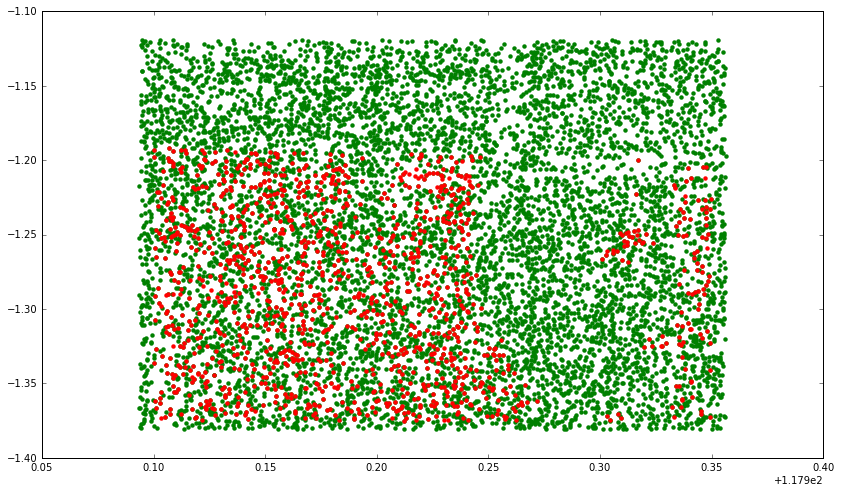

In [11]:
plt.scatter(dcat['ra'], dcat['dec'], lw=0, c='g')
plt.scatter(scat['RA'], scat['DEC'], lw=0, c='r')

For unclear reasons, all of the SDSS fields near the deep-r area seem to be problematic somehow.  Forging ahead, but probably not a good idea to dig into SDSS completeness too much here, even though DECALS should be *much* better

/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


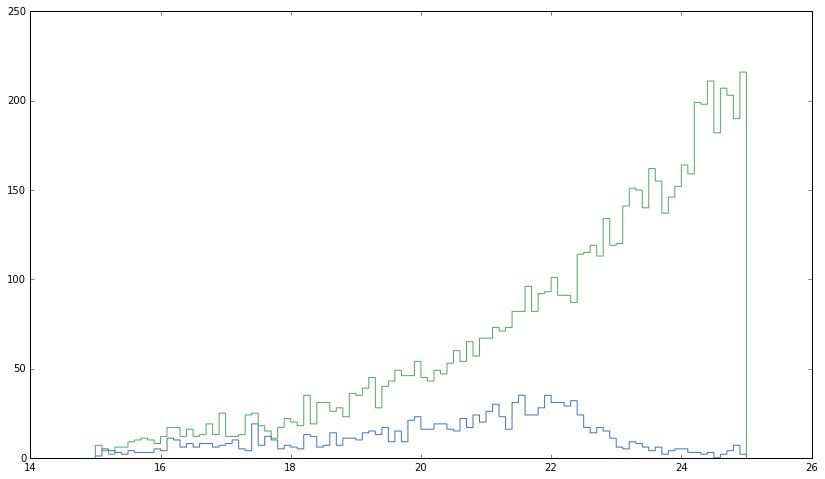

In [12]:
plt.hist(scat['r'], bins=100, histtype='step', range=(15, 25))
plt.hist(dcat['r'], bins=100, histtype='step', range=(15, 25))
None

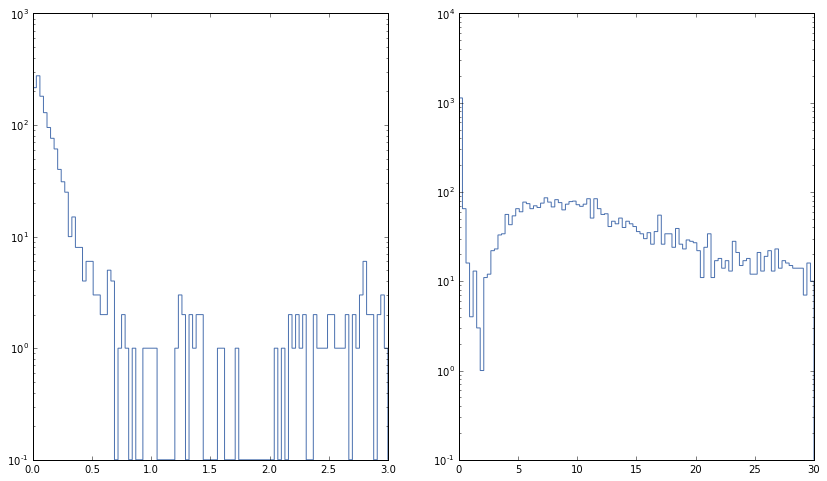

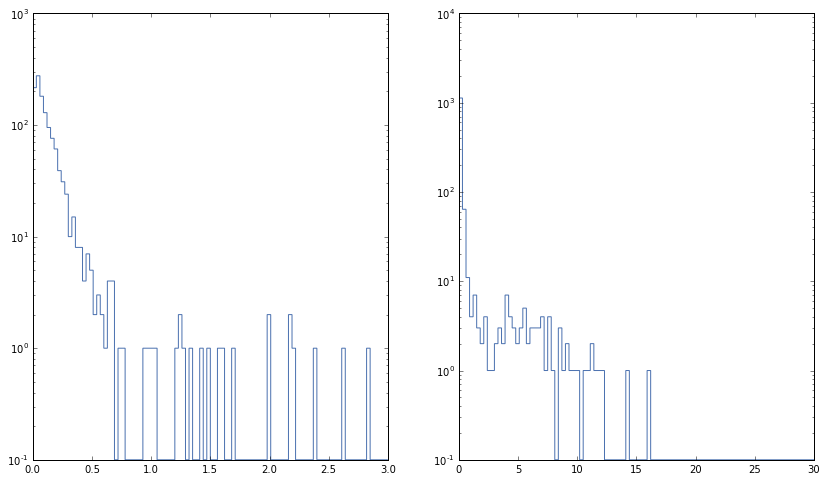

In [13]:
ssc = SkyCoord(scat['RA'], scat['DEC'], unit=u.deg)
dsc = SkyCoord(dcat['ra'], dcat['dec'], unit=u.deg)

idx, d2d, _ = dsc.match_to_catalog_sky(ssc)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(d2d.arcsec, bins=100, histtype='step', range=(0, 3), log=True)
ax2.hist(d2d.arcsec, bins=100, histtype='step', range=(0, 30), log=True)


idx, d2d, _ = ssc.match_to_catalog_sky(dsc)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(d2d.arcsec, bins=100, histtype='step', range=(0, 3), log=True)
ax2.hist(d2d.arcsec, bins=100, histtype='step', range=(0, 30), log=True)
None

OK, looks like all the w/i ~1" matches are real, and essentially everything has a match from the SDSS

(10, 24)

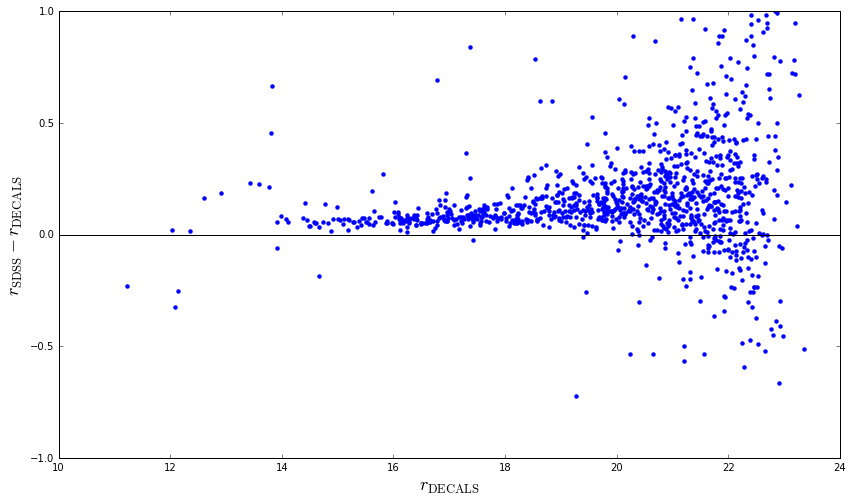

In [14]:
dmatch = dcat[idx[d2d<1*u.arcsec]]
smatch = scat[d2d<1*u.arcsec]

plt.axhline(0, c='k')
plt.scatter(dmatch['r'], smatch['r']- dmatch['r'], lw=0)
plt.ylim(-1, 1)
plt.xlabel(r'$r_{\rm DECALS}$', fontsize=18)
plt.ylabel(r'$r_{\rm SDSS} - r_{\rm DECALS}$', fontsize=18)
plt.xlim(10, 24)

OK, so there's a small flux offset, probably due to different flux definitions, but probably not a big systematic effect.  Lets press on.

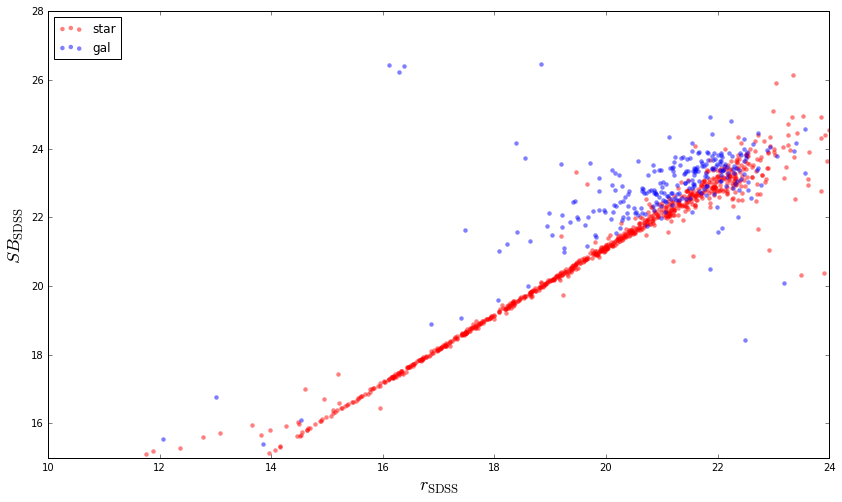

In [15]:
starmsk = smatch['PHOT_SG']=='STAR'

plt.scatter(smatch['r'][starmsk], smatch['SB_PETRO_R'][starmsk], lw=0, c='r', alpha=.5, label='star')
plt.scatter(smatch['r'][~starmsk], smatch['SB_PETRO_R'][~starmsk], lw=0, c='b', alpha=.5, label='gal')
plt.legend(loc='upper left')
plt.xlim(10, 24)
plt.ylim(15, 28)
plt.xlabel(r'$r_{\rm SDSS}$', fontsize=18)
plt.ylabel(r'$SB_{\rm SDSS}$', fontsize=18)

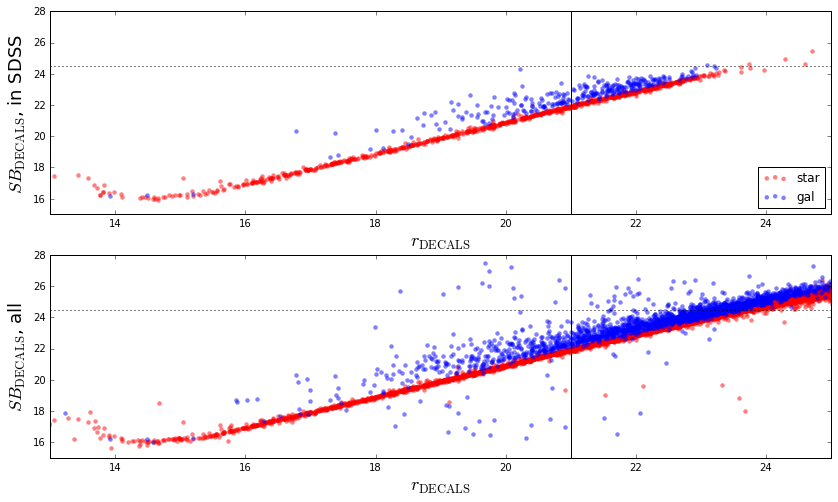

In [16]:
fig, (ax1,ax2) = plt.subplots(2, 1)

starmsk_match = dmatch['type']=='PSF '

ax1.scatter(dmatch['r'][starmsk_match], dmatch['sb_r_0.5'][starmsk_match], lw=0, c='r', alpha=.5, label='star')
ax1.scatter(dmatch['r'][~starmsk_match], dmatch['sb_r_0.5'][~starmsk_match], lw=0, c='b', alpha=.5, label='gal')
ax1.legend(loc='lower right')

starmsk = dcat['type']=='PSF '

plt.scatter(dcat['r'][starmsk], dcat['sb_r_0.5'][starmsk], lw=0, c='r', alpha=.5)
plt.scatter(dcat['r'][~starmsk], dcat['sb_r_0.5'][~starmsk], lw=0, c='b', alpha=.5)

for ax in (ax1, ax2):
    ax.set_xlim(13, 25)
    ax.set_ylim(15, 28)
    ax.axvline(21, c='k')
    ax.axhline(24.5, c='k', ls=':')
    ax.set_xlabel(r'$r_{\rm DECALS}$', fontsize=18)
ax1.set_ylabel(r'$SB_{\rm DECALS}$, in SDSS', fontsize=18)
ax2.set_ylabel(r'$SB_{\rm DECALS}$, all', fontsize=18)

There *are* some things at very low DECAM SB that aren't showing up in the SDSS X-match... lets see what they are.

In [17]:
to_check = (dcat['r']<21)&(dcat['sb_r_0.5']>24.5)

de_cutout_url = 'http://legacysurvey.org/viewer/jpeg-cutout/?ra={0.ra.deg}&dec={0.dec.deg}&layer=decals-dr3&pixscale=0.1&bands=grz'
sd_cutout_url = 'http://legacysurvey.org/viewer/jpeg-cutout/?ra={0.ra.deg}&dec={0.dec.deg}&layer=sdssco&pixscale=0.1&bands=gri'

tabrows = []
for row in dcat[to_check]:
    sc = SkyCoord(row['ra'], row['dec'], unit=u.deg)
    objstr = '{}_{}<br>r={:.2f}<br>sb={:.2f}'.format(row['brickid'], row['objid'], row['r'], row['sb_r_0.5'])
    deimg = '<img src="{}">'.format(de_cutout_url.format(sc))
    sdimg = '<img src="{}">'.format(sd_cutout_url.format(sc))
    tabrows.append('<tr><td>{}</td><td>{}</td><td>{}</td></tr>'.format(objstr, deimg, sdimg))
    
display.HTML("""
<table>

<tr>
<th>obj</th>
<th>DECALS</th>
<th>SDSS</th>
</tr>

{}
</table>
""".format('\n'.join(tabrows)))

/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


obj,DECALS,SDSS
323640_562r=16.08sb=inf,,
323640_678r=20.08sb=27.24,,
323640_793r=18.50sb=inf,,
323640_993r=19.64sb=26.22,,
323640_1072r=18.38sb=inf,,
323640_2925r=19.00sb=inf,,
323640_2942r=19.75sb=25.98,,
323640_2945r=19.74sb=26.97,,
323640_4309r=20.04sb=inf,,
323640_4805r=20.11sb=25.90,,


# deep_g brick

In [18]:
dcat = decals_catalogs[1]
scat = sdss_catalogs[1]

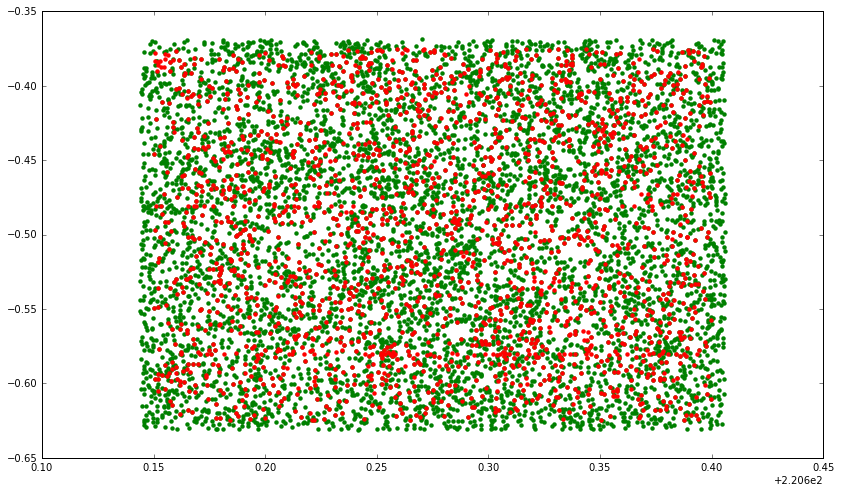

In [19]:
plt.scatter(dcat['ra'], dcat['dec'], lw=0, c='g')
plt.scatter(scat['RA'], scat['DEC'], lw=0, c='r')

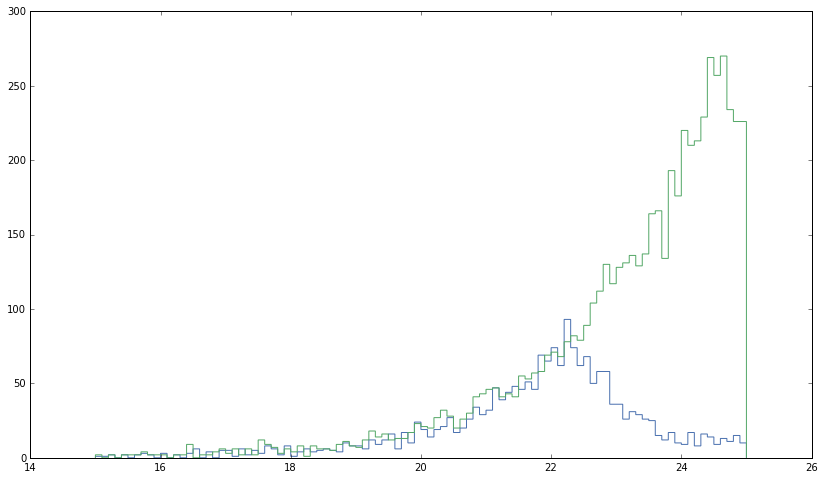

In [20]:
plt.hist(scat['r'], bins=100, histtype='step', range=(15, 25))
plt.hist(dcat['r'], bins=100, histtype='step', range=(15, 25))
None

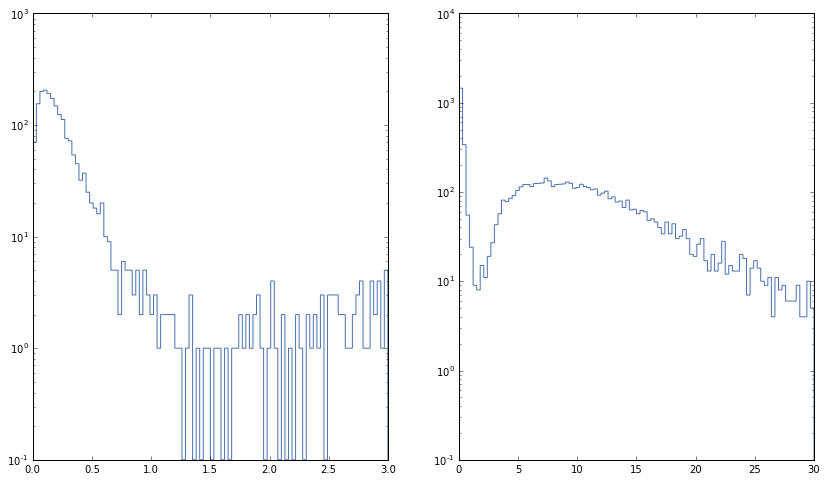

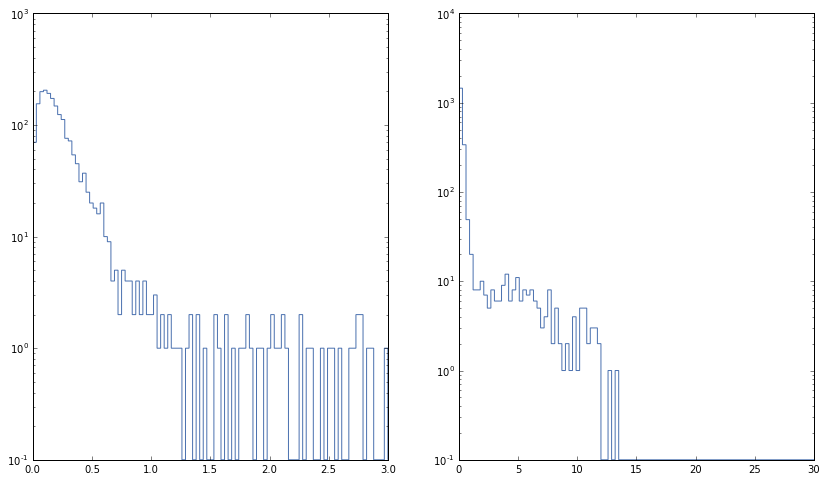

In [21]:
ssc = SkyCoord(scat['RA'], scat['DEC'], unit=u.deg)
dsc = SkyCoord(dcat['ra'], dcat['dec'], unit=u.deg)

idx, d2d, _ = dsc.match_to_catalog_sky(ssc)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(d2d.arcsec, bins=100, histtype='step', range=(0, 3), log=True)
ax2.hist(d2d.arcsec, bins=100, histtype='step', range=(0, 30), log=True)


idx, d2d, _ = ssc.match_to_catalog_sky(dsc)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(d2d.arcsec, bins=100, histtype='step', range=(0, 3), log=True)
ax2.hist(d2d.arcsec, bins=100, histtype='step', range=(0, 30), log=True)
None

OK, looks like all the w/i ~1.5" matches are real, and most things have a match from the SDSS

(10, 24)

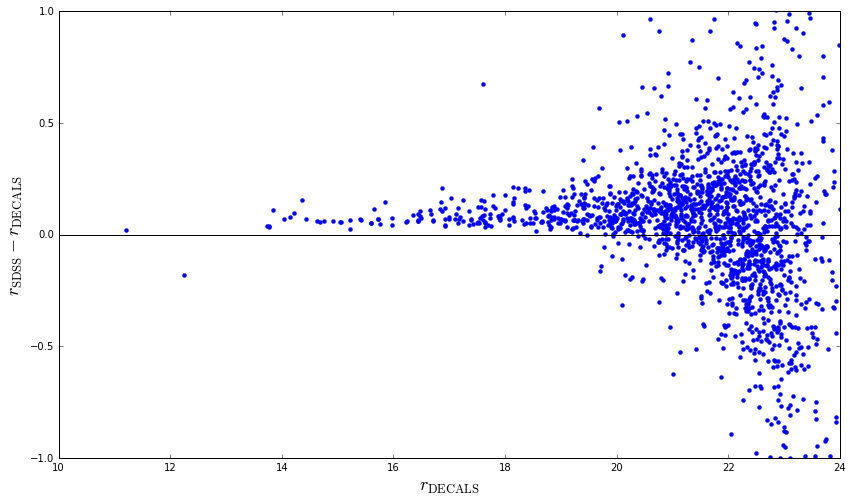

In [22]:
dmatch = dcat[idx[d2d<1.5*u.arcsec]]
smatch = scat[d2d<1.5*u.arcsec]

plt.axhline(0, c='k')
plt.scatter(dmatch['r'], smatch['r']- dmatch['r'], lw=0)
plt.ylim(-1, 1)
plt.xlabel(r'$r_{\rm DECALS}$', fontsize=18)
plt.ylabel(r'$r_{\rm SDSS} - r_{\rm DECALS}$', fontsize=18)
plt.xlim(10, 24)

OK, so there's a small flux offset, probably due to different flux definitions, but probably not a big systematic effect.  Lets press on.

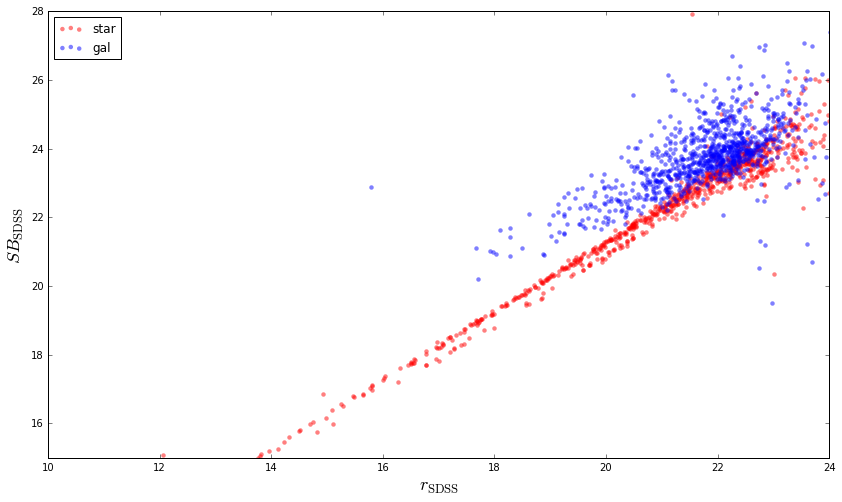

In [23]:
starmsk = smatch['PHOT_SG']=='STAR'

plt.scatter(smatch['r'][starmsk], smatch['SB_PETRO_R'][starmsk], lw=0, c='r', alpha=.5, label='star')
plt.scatter(smatch['r'][~starmsk], smatch['SB_PETRO_R'][~starmsk], lw=0, c='b', alpha=.5, label='gal')
plt.legend(loc='upper left')
plt.xlim(10, 24)
plt.ylim(15, 28)
plt.xlabel(r'$r_{\rm SDSS}$', fontsize=18)
plt.ylabel(r'$SB_{\rm SDSS}$', fontsize=18)

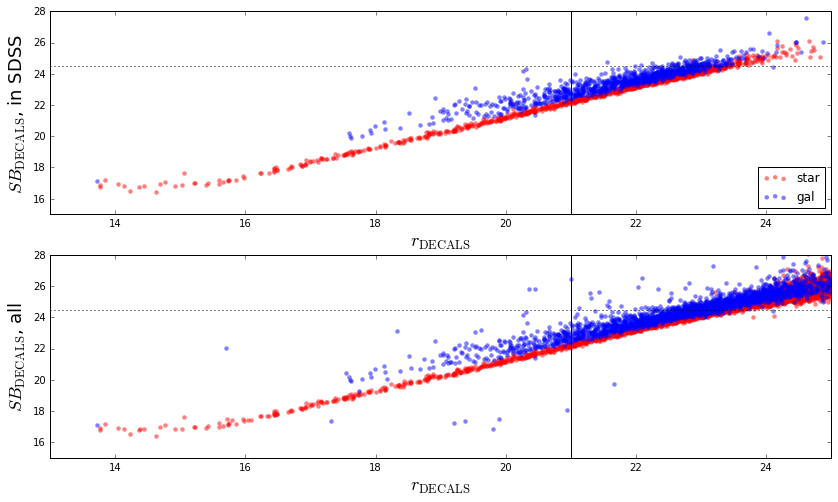

In [24]:
fig, (ax1,ax2) = plt.subplots(2, 1)

starmsk_match = dmatch['type']=='PSF '

ax1.scatter(dmatch['r'][starmsk_match], dmatch['sb_r_0.5'][starmsk_match], lw=0, c='r', alpha=.5, label='star')
ax1.scatter(dmatch['r'][~starmsk_match], dmatch['sb_r_0.5'][~starmsk_match], lw=0, c='b', alpha=.5, label='gal')
ax1.legend(loc='lower right')

starmsk = dcat['type']=='PSF '

plt.scatter(dcat['r'][starmsk], dcat['sb_r_0.5'][starmsk], lw=0, c='r', alpha=.5)
plt.scatter(dcat['r'][~starmsk], dcat['sb_r_0.5'][~starmsk], lw=0, c='b', alpha=.5)

for ax in (ax1, ax2):
    ax.set_xlim(13, 25)
    ax.set_ylim(15, 28)
    ax.axvline(21, c='k')
    ax.axhline(24.5, c='k', ls=':')
    ax.set_xlabel(r'$r_{\rm DECALS}$', fontsize=18)
ax1.set_ylabel(r'$SB_{\rm DECALS}$, in SDSS', fontsize=18)
ax2.set_ylabel(r'$SB_{\rm DECALS}$, all', fontsize=18)

There are a few things at very low DECAM SB that aren't showing up in the SDSS X-match... lets see what they are.

In [25]:
to_check = (dcat['r']<21)&(dcat['sb_r_0.5']>24.5)

de_cutout_url = 'http://legacysurvey.org/viewer/jpeg-cutout/?ra={0.ra.deg}&dec={0.dec.deg}&layer=decals-dr3&pixscale=0.1&bands=grz'
sd_cutout_url = 'http://legacysurvey.org/viewer/jpeg-cutout/?ra={0.ra.deg}&dec={0.dec.deg}&layer=sdssco&pixscale=0.1&bands=gri'

tabrows = []
for row in dcat[to_check]:
    sc = SkyCoord(row['ra'], row['dec'], unit=u.deg)
    objstr = '{}_{}<br>r={:.2f}<br>sb={:.2f}'.format(row['brickid'], row['objid'], row['r'], row['sb_r_0.5'])
    deimg = '<img src="{}">'.format(de_cutout_url.format(sc))
    sdimg = '<img src="{}">'.format(sd_cutout_url.format(sc))
    tabrows.append('<tr><td>{}</td><td>{}</td><td>{}</td></tr>'.format(objstr, deimg, sdimg))
    
display.HTML("""
<table>

<tr>
<th>obj</th>
<th>DECALS</th>
<th>SDSS</th>
</tr>

{}
</table>
""".format('\n'.join(tabrows)))

/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/Users/erik/miniconda3/envs/saga/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


obj,DECALS,SDSS
328371_42r=17.49sb=inf,,
328371_50r=20.35sb=25.83,,
328371_785r=20.45sb=25.81,,
328371_7022r=10.97sb=inf,,
